## Metoda kierunków sprzężonych Powella jako metoda bezgradientowa

Jest to metoda bezgradientowego poszukiwania minimum funkcji. Oznaczmy tę funkcję jako f. Przedstawia się ta metoda następująco:

1. Mamy daną bazę kanoniczną B przestrzeni wymiaru n, w której poszukujemy rozwiązania (wektory liniowo niezależne o jednej współrzędnej 1, pozostałych 0) i punkt początkowy x.
2. Zapamiętujemy położenie punktu x jako x_old.
3. Kolejno dla każdego kierunku z bazy B dokonujemy optymalizacji kierunkowej (jak w metodzie największego spadku) modyfikując x n razy.
4. Wyznaczamy tzw. kierunek sprzężony $s = \frac{x-x_{old}}{||x-x_{old}||}$.
5. Dokonujemy optymalizacji kierunkowej w kierunku s.
6. Zamieniamy jeden wektor z bazy B na s (np. dołączamy go jako ostatni wektor do B, a następnie usuwamy pierwszy wektor z B).
7. Sprawdzamy warunek stopu (np. $||x-x_{old}||<\epsilon$). Jeżeli nie jest spełniony, to wracamy do 2.

Istnieje pewne ryzyko, że nasza baza przestanie być bazą ze względu na utracenie liniowej niezależności wektorów, przez co powstały pewne modyfikacje tej metody. W wypadku optymalizacji dwuwymiarowej nie jest to problemem, lecz więcej można przeczytać na ten temat np. w: [http://www.kmg.zut.edu.pl/opt/wyklad/bezgrad/1powell.html](http://www.kmg.zut.edu.pl/opt/wyklad/bezgrad/1powell.html)

### Zadanie 1 (2 pkt)
Zastosuj ten algorytm do minimalizacji funkcji Rosenbrocka danej wzorem $f(x,y)=(1-x)^2 + 100(y-x^2)^2$

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
## PISZ TUTAJ

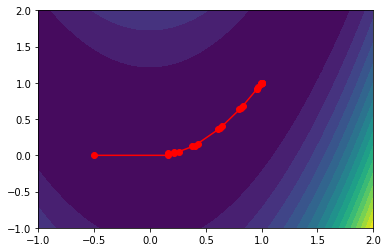

In [4]:
x = np.linspace(-1,2,100)
y = np.linspace(-1,2,100)
xx,yy = np.meshgrid(x,y)
z = function(np.array([xx,yy]))
plt.contourf(xx,yy,z, levels=20)
plt.plot(history[:,0],history[:,1], '-o', c='r')

## Zadanie 2 - Sprężyste ciało (4 pkt)

Mamy prostokątne ciało sprężyste o (domyślnych) wymiarach 5x1 zaczepione po bokach. Okazuje się, że możemy wyznaczyć jego odkształcenie pod wpływem działających sił rozwiązując pewne zadanie optymalizacji.

In [5]:
from scipy import optimize

Komórka poniżej zawiera parametry ciała, które możesz zmieniać. mi i lambda_ to tzw. stałe Lamego charakterystyczne dla materiału. dx oznacza ilość punktów na każdą jednostkę długości (im więcej, tym "gęstsze obliczenia").
fx i fy to siły wewnętrzne działające na ciało - funkcja dla danej wartości x i y zwraca gęstość siły odpowiednio wzdłuż osi x i y.

In [6]:
mi = 0.385
lambda_ = 0.13
dx = 5

size_y = 1
size_x = 5

def fx(x, y):
    x = np.array(x)
    y = np.array(y)
    result = np.zeros_like(x)
    cond = (0 <= x) & (x <= 5) & (0 <= y) & (y <= 1)
    result[cond] = 0
    return result

def fy(x, y):
    x = np.array(x)
    y = np.array(y)
    result = np.zeros_like(x)
    cond = (0 <= x) & (x <= 5) & (0 <= y) & (y <= 1)
    result[cond] = -0.03
    return result

W komórce poniżej dzieją się straszne rzeczy. Jeżeli chcesz je zrozumieć, to proponuję zapoznać się z metodą elementów skończonych np. na kursie Numeryczne Rozwiązywanie Równań Różniczkowych Cząstkowych. Do zadania nie jest zupełnie potrzebne.

In [7]:
points_y = size_y * dx
points_x = size_x * dx
aOfElements = (points_y + 1) * (points_x - 1)
triangle_surface_part = 0.5
phinum = [(a, b) for a in range(points_x - 1) for b in range(points_y + 1)]

A = np.zeros((aOfElements * 2, aOfElements * 2))
F = np.zeros(aOfElements * 2)
#(a,0),(b,0)
for i in range(aOfElements):
    for j in range(aOfElements):
        if i == j:
            A[i, j] = (12 * mi + 4 * lambda_) * triangle_surface_part
            if phinum[i][1] in [0, points_y]:
                A[i, j] = A[i, j] / 2
        elif phinum[i][0] in [phinum[j][0] + 1, phinum[j][0] - 1] and phinum[i][1] == phinum[j][1]:
            A[i, j] = (-4 * mi - 2 * lambda_) * triangle_surface_part
            if phinum[i][1] in [0, points_y]:
                A[i, j] = A[i, j] / 2
        elif phinum[i][1] in [phinum[j][1] + 1, phinum[j][1] - 1] and phinum[i][0] == phinum[j][0]:
            A[i, j] = -2 * mi * triangle_surface_part
#(0,a),(0,b)
for i in range(aOfElements):
    for j in range(aOfElements):
        if i == j:
            A[i + aOfElements, j + aOfElements] = (4 * lambda_ + 12 * mi) * triangle_surface_part
            if phinum[i][1] in [0, points_y]:
                A[i + aOfElements, j + aOfElements] /= 2
        elif phinum[i][0] in [phinum[j][0] + 1, phinum[j][0] - 1] and phinum[i][1] == phinum[j][1]:
            A[i + aOfElements, j + aOfElements] = -2 * mi * triangle_surface_part
            if phinum[i][1] in [0, points_y]:
                A[i + aOfElements, j + aOfElements] /= 2
        elif phinum[i][1] in [phinum[j][1] + 1, phinum[j][1] - 1] and phinum[i][0] == phinum[j][0]:
            A[i + aOfElements, j + aOfElements] = (-4 * mi - 2 * lambda_) * triangle_surface_part
#(a,0),(0,b) and (0,a),(b,0)
for i in range(aOfElements):
    for j in range(aOfElements):
        if i == j:
            A[i, j + aOfElements] = (2 * lambda_ + 2 * mi) * triangle_surface_part
            if phinum[i][1] in [0, points_y]:
                A[i, j + aOfElements] /= 2
        elif abs(phinum[i][0] - phinum[j][0]) == 1 and phinum[i][1] == phinum[j][1]:
            if phinum[i][1] == 0:
                if i > j:
                    A[i, j + aOfElements] = -lambda_ * triangle_surface_part
                else:
                    A[i, j + aOfElements] = -mi * triangle_surface_part
            elif phinum[i][1] == points_y:
                if i > j:
                    A[i, j + aOfElements] = -mi * triangle_surface_part
                else:
                    A[i, j + aOfElements] = -lambda_ * triangle_surface_part
            else:
                A[i, j + aOfElements] = (-mi - lambda_) * triangle_surface_part
        elif abs(phinum[i][1] - phinum[j][1]) == 1 and phinum[i][0] == phinum[j][0]:
            A[i, j + aOfElements] = (-mi - lambda_) * triangle_surface_part
        elif (phinum[i][1] == phinum[j][1] + 1 and phinum[i][0] == phinum[j][0] - 1) or (
                phinum[i][1] == phinum[j][1] - 1 and phinum[i][0] == phinum[j][0] + 1):
            A[i, j + aOfElements] = (mi + lambda_) * triangle_surface_part
A[aOfElements:, :aOfElements] = A[:aOfElements, aOfElements:].T

for i in range(aOfElements):
    F[i] = (1/dx) ** 2 * fx((phinum[i][0]+1) / dx, (phinum[i][1]) / dx)
    F[i + aOfElements] = (1/dx) ** 2 * fy((phinum[i][0]+1) / dx, (phinum[i][1]) / dx)
    if phinum[i][1] in [0, points_y]:
        F[i] = F[i] / 2
        F[i + aOfElements] = F[i + aOfElements] / 2

u = np.zeros([aOfElements, 2])
contact = []
for i in range(aOfElements):
    u[i] = np.array([(phinum[i][0] + 1) / dx, (phinum[i][1]) / dx])
    if phinum[i][1] == 0:
        contact.append(i)

Poniżej mamy narysowane poszczególne punkty ciała. u[i] przechowuje współrzędne i-tego punktu, którego będziemy wyliczać odkształcenie.

(-1, 1.1)

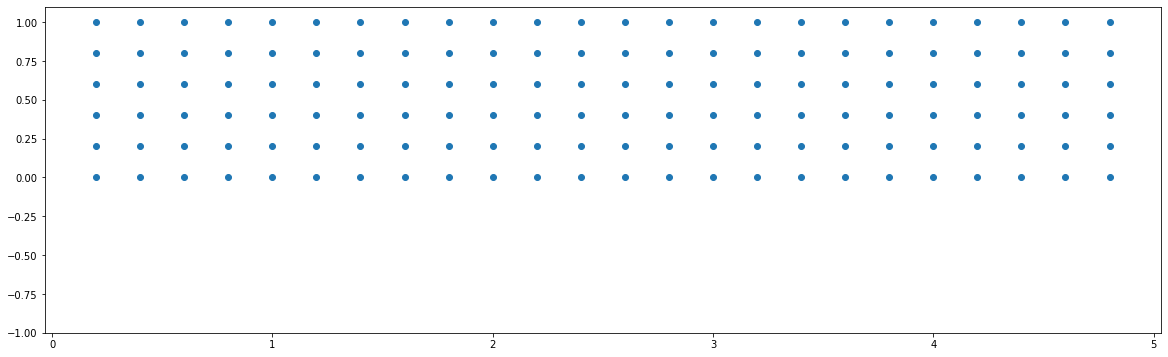

In [8]:
plt.figure(figsize=(20, 6))
plt.scatter(u[:,0], u[:,1])
plt.ylim(-1,1.1)

Twoim zadaniem jest zminimalizować poniższy "funkcjonał" wykorzystując 2 różne metody pakietu `scipy.optimize`. Jeżeli mamy N punktów naszego ciała, to ta funkcja przyjmuje wektor długości 2*N. Argumenty, dla których poniższa funkcja osiąga minimum, dają nam przemieszczenie poszczególnych punktów, a konkretnie to dla i-tego punktu a[i] oznacza przemieszczenie wzdłuż osi x, a a[i + aOfElements] przemieszczenie wzdłuż osi y.
Zakładamy, że pod ciałem znajduje się jakaś przeszkoda stawiająca opór - współczynnik `coeff` charakteryzuje jaki opór stawia - im większa wartość, to tym większy opór, 0 oznacza brak oporu.
Zwizualizuj kształt odkształconego ciała na wykresie.

In [9]:
coeff = 1
def functional(a):
    cond = a[contact] < 0
    return 0.5 * a @ A @ a - F @ a + coeff * np.sum(-a[contact][cond])

## PISZ TUTAJ


Optimization terminated successfully.
         Current function value: -0.036165
         Iterations: 70
         Function evaluations: 183139


(-1, 1.1)

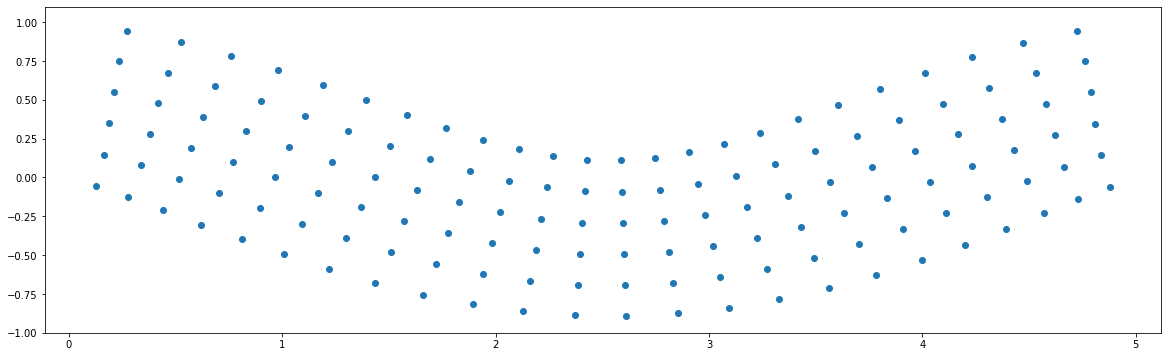

In [10]:
## przykładowy wykres symulacji bez oporu

(-1, 1.1)

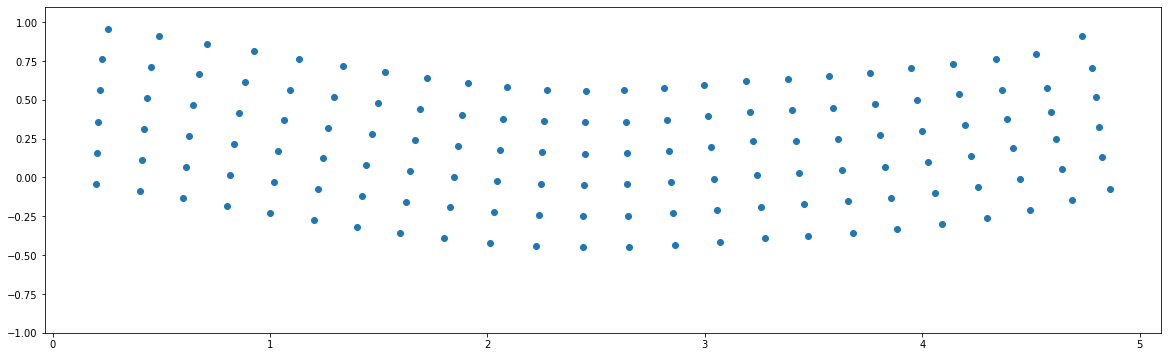

In [194]:
## przykładowy wykres symulacji z coeff = 1